Enter some content (or type 'exit' to quit): I had an amazing vacation in the mountains; the scenery was breathtaking
Predicted Sentiment: Positive, Confidence: 0.99

Enter some content (or type 'exit' to quit): The movie was a letdown; the plot was confusing and the acting was poor.
Predicted Sentiment: Negative, Confidence: 0.97

Enter some content (or type 'exit' to quit): The car model comes in five different colors.
Predicted Sentiment: Neutral, Confidence: 0.75

Enter some content (or type 'exit' to quit): My favorite restaurant just launched a new delicious menu item
Predicted Sentiment: Positive, Confidence: 0.99

Enter some content (or type 'exit' to quit): A devastating earthquake has left thousands homeless in the affected areas
Predicted Sentiment: Negative, Confidence: 0.91

Enter some content (or type 'exit' to quit): The train departs from platform 5 at 10:15 AM
Predicted Sentiment: Neutral, Confidence: 0.94

Enter some content (or type 'exit' to quit): exit


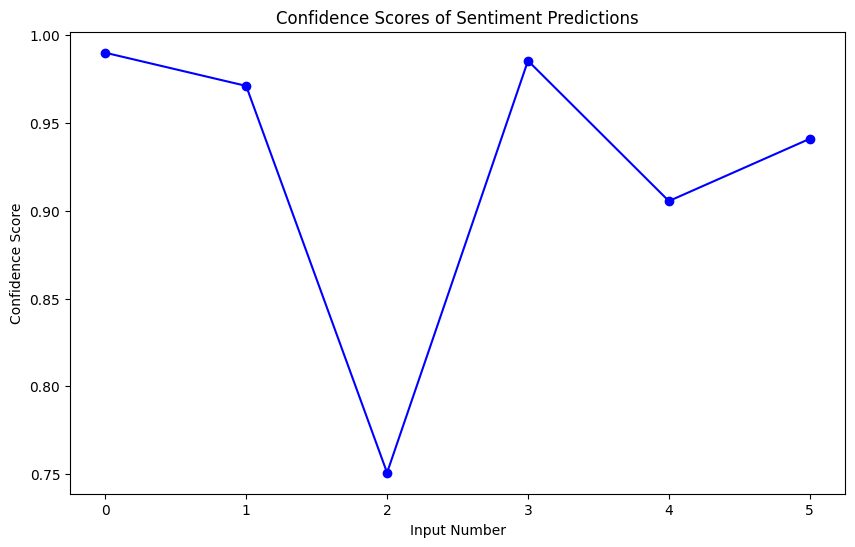

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# Sample dataset of content with labels (Positive, Negative, Neutral)
data = {
    "content": [
        "The new electric car model is an environmental breakthrough.",
        "Global warming is accelerating, and the effects are catastrophic.",
        "The upcoming tech conference promises to showcase groundbreaking innovations.",
        "Experts warn about the dangerous rise of cybercrime in the digital age.",
        "Healthcare advancements are making significant strides in combating chronic diseases.",
        "The country's inflation rate has reached a 30-year high.",
        "A new coffee shop just opened in town and it's gaining popularity quickly.",
        "The latest space mission has successfully landed on Mars.",
        "Political tensions are rising between neighboring countries over territorial disputes.",
        "Scientists are exploring new ways to harness renewable energy sources."
    ],
    "sentiment": [
        "Positive", "Negative", "Neutral", "Negative", "Positive", "Negative", "Neutral", "Positive", "Negative", "Neutral"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the data to a CSV file for further use
df.to_csv("content_sentiment_dataset.csv", index=False)

# Display the sample dataset
df.head()

# Initialize the sentiment analysis pipeline with a pre-trained model
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Function to map the model's output label to sentiment
def map_sentiment(result):
    label = result[0]['label']

    # Map the labels to human-readable sentiments
    if label == 'LABEL_0':  # Negative
        return "Negative"
    elif label == 'LABEL_1':  # Neutral
        return "Neutral"
    elif label == 'LABEL_2':  # Positive
        return "Positive"
    else:
        return "Neutral"  # Default to Neutral if the label is unrecognized

sentiments = []
scores = []

# Loop to get user input, classify, and store results
while True:
    user_text = input("Enter some content (or type 'exit' to quit): ")
    if user_text.lower() == 'exit':
        break
    result = classifier(user_text)
    sentiment = map_sentiment(result)  # Directly map model result to sentiment

    sentiments.append(sentiment)
    scores.append(result[0]['score'])

    print(f"Predicted Sentiment: {sentiment}, Confidence: {result[0]['score']:.2f}\n")

# Plotting the confidence scores for each user input
plt.figure(figsize=(10, 6))
plt.plot(scores, marker='o', color='b')
plt.title('Confidence Scores of Sentiment Predictions')
plt.xlabel('Input Number')
plt.ylabel('Confidence Score')
plt.show()


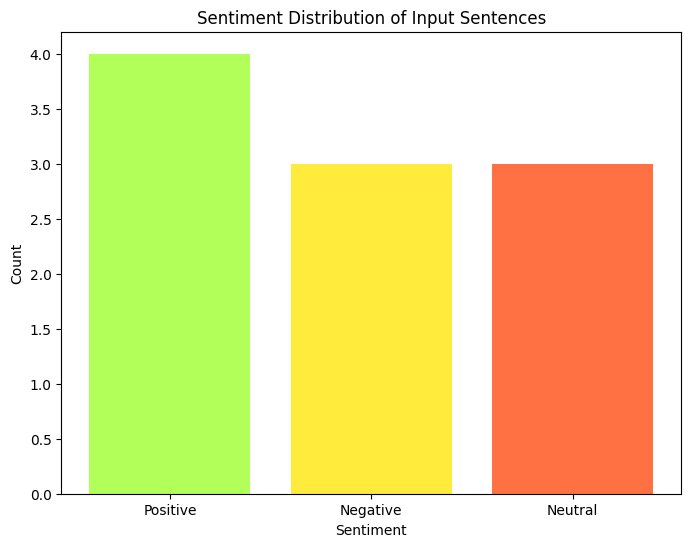

In [8]:
import matplotlib.pyplot as plt

# Sample sentiment predictions (you can replace these with actual predictions from your classifier)
sentiments = ['Positive', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Negative', 'Positive']

# Count the occurrences of each sentiment
sentiment_counts = {
    'Positive': sentiments.count('Positive'),
    'Negative': sentiments.count('Negative'),
    'Neutral': sentiments.count('Neutral')
}

# Plotting the sentiment distribution with light colors
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['#B2FF59', '#FFEB3B', '#FF7043'])  # Light colors for Positive, Neutral, Negative
plt.title('Sentiment Distribution of Input Sentences')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()
